In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [218]:
df = pd.read_csv('NPS_2017.csv')
df.dropna(how='any', inplace=True)

In [219]:
locs = {}
for ind, loc in enumerate(df['Location'].unique()):
    locs[loc] = ind
print(locs)

{'San Francisco': 0, 'Los Angeles': 1, 'New York City': 2, 'Redwood City': 3, 'Santa Clara': 4, 'Oakland': 5, 'Washington DC': 6, 'Chicago': 7, 'Atlanta': 8, 'Hong Kong': 9, 'Beijing': 10, 'Tokyo': 11}


In [220]:
ratings_dict = {}
for ind, rat in enumerate(df['Rating (Num)'].unique()):
    ratings_dict[rat] = ind
print(ratings_dict)

{'3': 0, '4': 1, '5': 2, '6': 3, '7': 4, '8': 5, '9': 6, '10': 7, '1': 8, '2': 9, '0': 10}


In [221]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right


In [222]:
traks = {}
for ind, trc in enumerate(df['Track'].unique()):
    traks[trc] = ind
print(traks)

{'Apps, Explorer': 0, 'Apps': 1, 'Games': 2, 'VR': 3, 'Games, Explorer': 4}


In [239]:
pace_rev = {}
pace = {'Just right': 0, 'A little too fast': 1, 'Way too slow': -2, 'A little too slow': -1, 'Way too fast': 2}
for key, val in pace.items():
    pace_rev[val] = key

In [224]:
week = {}
for ind, wk in enumerate(df['Week'].unique()):
    week[wk] = ind+1
print(week)

{'Week 1': 1, 'Week 7': 2, 'Week 2': 3, 'Week 3': 4, 'Week 4': 5, 'Week 5': 6, 'Week 6': 7, 'Week 8': 8}


In [225]:
df['Rating'] = df['Rating (Num)'].map( {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '0':0} ).astype(int)

In [226]:
df['Pacing'] = df['Schedule Pacing'].map(pace).astype(int)

In [227]:
df['Track'] = df['Track'].map(traks).astype(int)

In [228]:
df['Week'] = df['Week'].map(week).astype(int)

In [229]:
df['Location'] = df['Location'].map(locs).astype(int)

In [230]:
df.drop(columns=['Rating (Num)', 'Schedule Pacing'], inplace=True)

In [240]:
df.head()

,ID,Location,Track,Week,Rating,Pacing,NPS
0,134,0,0,1,3,0,-1
626,660,0,0,5,8,1,0
625,659,0,1,5,8,0,0
624,658,0,1,5,10,0,1
519,549,0,1,4,9,0,1


In [232]:
# Promoter (9 – 10)
# Passive (7 – 8)
# Detractor (1 – 6)

df['NPS'] = df['Rating'].map({10:1, 9:1, 8:0, 7:0, 6:-1, 5:-1, 4:-1, 3:-1, 2:-1, 1:-1, 0:-1}).astype(int)

In [246]:
loc_nums = sorted(list(df['Location'].value_counts().items()))
location_data = {}
running_count = 0
# Make sure overall data is sorted so that slices get the correct values
df.sort_values('Location', inplace=True)

weeks = {}
speed = {}

for ind, loc in enumerate(loc_nums):
    city_num, count = loc[0], loc[1]
    week_max = 0
    data_range = df[running_count+1:running_count+count]
    # initial case 
    if ind==0:
        location_data[city_num] = df[:count]
    else:
        location_data[city_num] = data_range
    speed[city_num] = (data_range['Pacing'].sum())/count
    week_max = data_range['Week'].max()
    running_count += count
    weeks[city_num] = week_max
presentable_dict = {}
count_nps = {}
presentable_weeks = {}
speed_loc = {}

# making data presentable
for key, value in location_data.items():
    city_name = ''
    for l, i in locs.items():
        if i == location_data[key].loc[:, 'Location'].iat[4]:
            city_name = l
            presentable_weeks[city_name] = weeks[i] 
            speed_loc[city_name] = speed[i]
    presentable_dict[city_name] = (location_data[key]['NPS'].sum()/(location_data[key]['NPS'].count()))*100
    count_nps[city_name] = location_data[key]['NPS'].count()
#     speed_loc[city]


print(speed_loc)
# print(presentable_dict, weeks, locs, presentable_weeks)

{'San Francisco': 0.45, 'Los Angeles': 0.5, 'New York City': 0.3484848484848485, 'Redwood City': 0.3275862068965517, 'Santa Clara': 0.42786069651741293, 'Oakland': 0.5319148936170213, 'Washington DC': 0.7021276595744681, 'Chicago': 0.5428571428571428, 'Atlanta': 0.24242424242424243, 'Hong Kong': 1.0909090909090908, 'Beijing': 0.6666666666666666, 'Tokyo': 0.676923076923077}


In [250]:
location_nps = pd.DataFrame.from_dict(presentable_dict, orient='index', columns=['Score'])

count_df = pd.DataFrame.from_dict(count_nps, orient='index', columns=['Count'])

weeks_df = pd.DataFrame.from_dict(presentable_weeks, orient='index', columns=['Weeks'])

speed_df = pd.DataFrame.from_dict(speed_loc, orient='index', columns=['Ave. Pacing'])

location_nps = location_nps.join(count_df)
location_nps = location_nps.join(weeks_df)
location_nps = location_nps.join(speed_df)

location_nps['C/W'] = np.rint(location_nps['Count']/location_nps['Weeks'])



location_nps

,Score,Count,Weeks,Ave. Pacing,C/W
Atlanta,75.000000,32,6,0.242424,5.0
Redwood City,43.859649,57,7,0.327586,8.0
New York City,37.689970,329,7,0.348485,47.0
Santa Clara,39.500000,200,7,0.427861,29.0
San Francisco,45.277778,360,8,0.450000,45.0
Los Angeles,59.047619,105,8,0.500000,13.0
Oakland,52.173913,46,7,0.531915,7.0
Chicago,47.826087,69,7,0.542857,10.0
Beijing,67.532468,77,4,0.666667,19.0
Tokyo,37.500000,64,4,0.676923,16.0


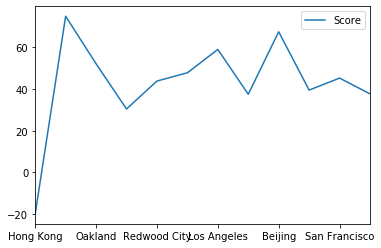

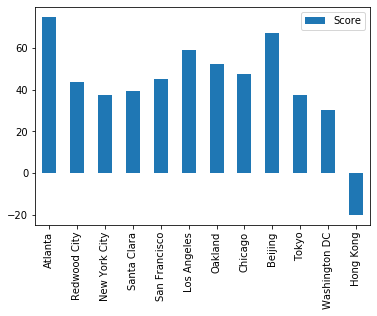

In [255]:
location_nps.sort_values('C/W', inplace=True)
location_nps.plot.line(y=['Score'])


location_nps.sort_values('Ave. Pacing', inplace=True)
location_nps.plot.bar(y=['Score'])